## 时间差分或TD学习（Temporal Difference or TD learning）

在蒙特卡洛学习方法中，它需要结束一个阶段，以便计算回报；然后用回报来估算动作值。  

TD Learning 会在每个时间步都做修改预测，而不是在等待互动结束后才更新值。可以使用TD学习解决连续性任务(continuous tasks)和阶段性任务(episodic tasks)。


### TD预测
（强化学习中的预测问题）：给定一个策略，如何估算(estimate)其值函数？  


### TD预测：动作值
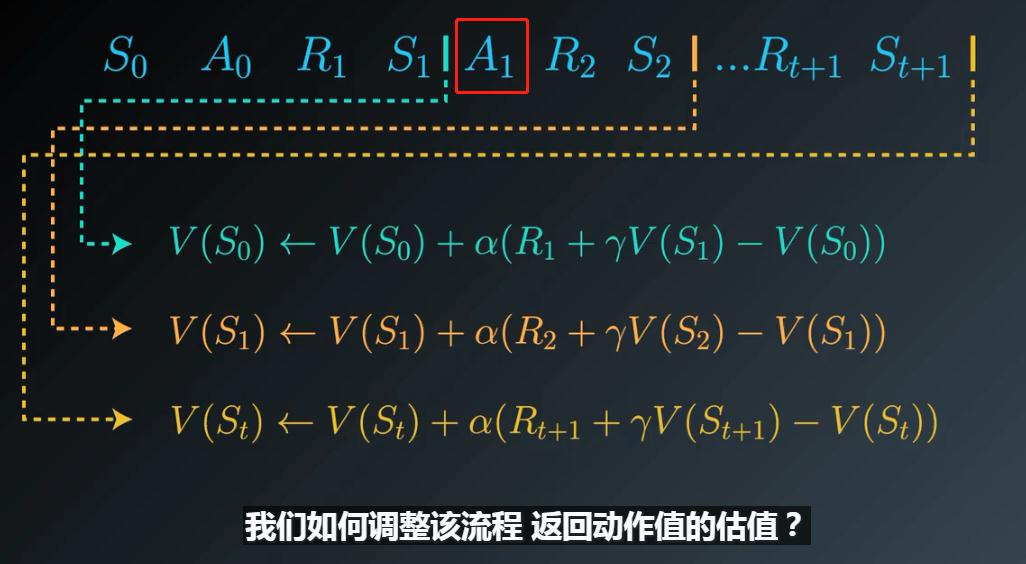

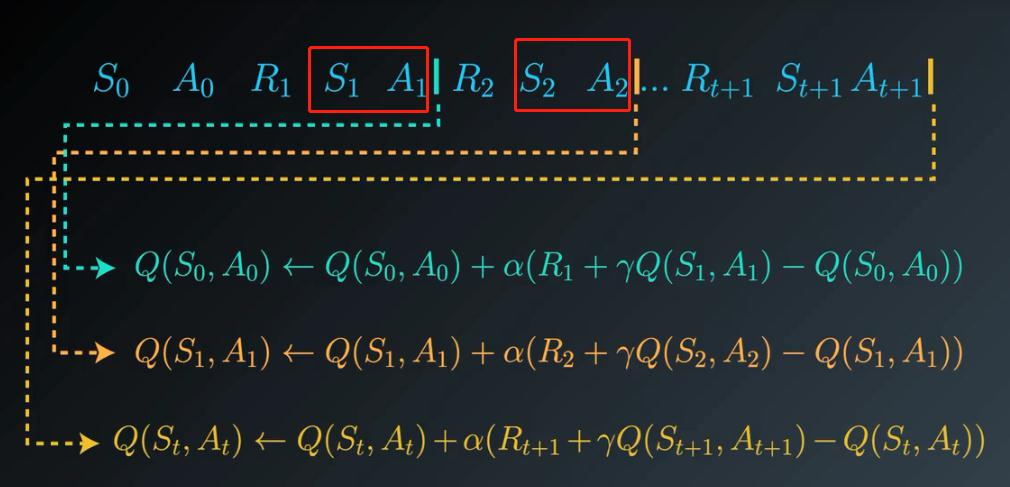

### TD控制：Sarsa(0)
每个动作值更新都使用状态动作奖励。
智能体如何确定最优策略？采用估算动作值函数的算法。 
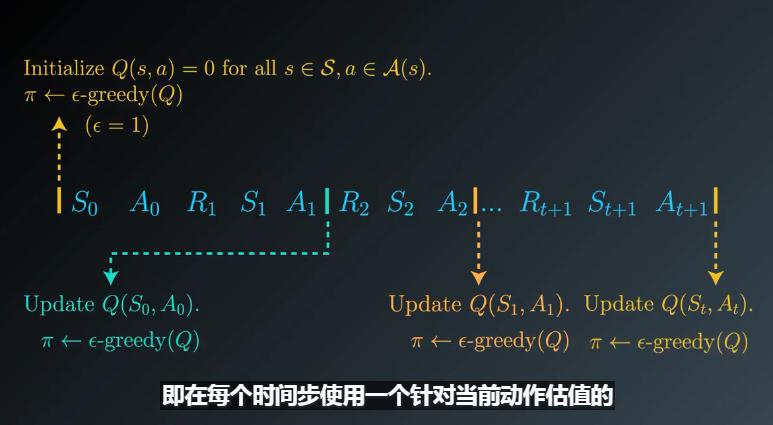
在初始时间步先将$\varepsilon$设为1，然后根据对等概率随机策略选择$A_{0}$和$A_{1}$, 只要为$\varepsilon$指定合适的值，该算法肯定会收敛域最优策略。

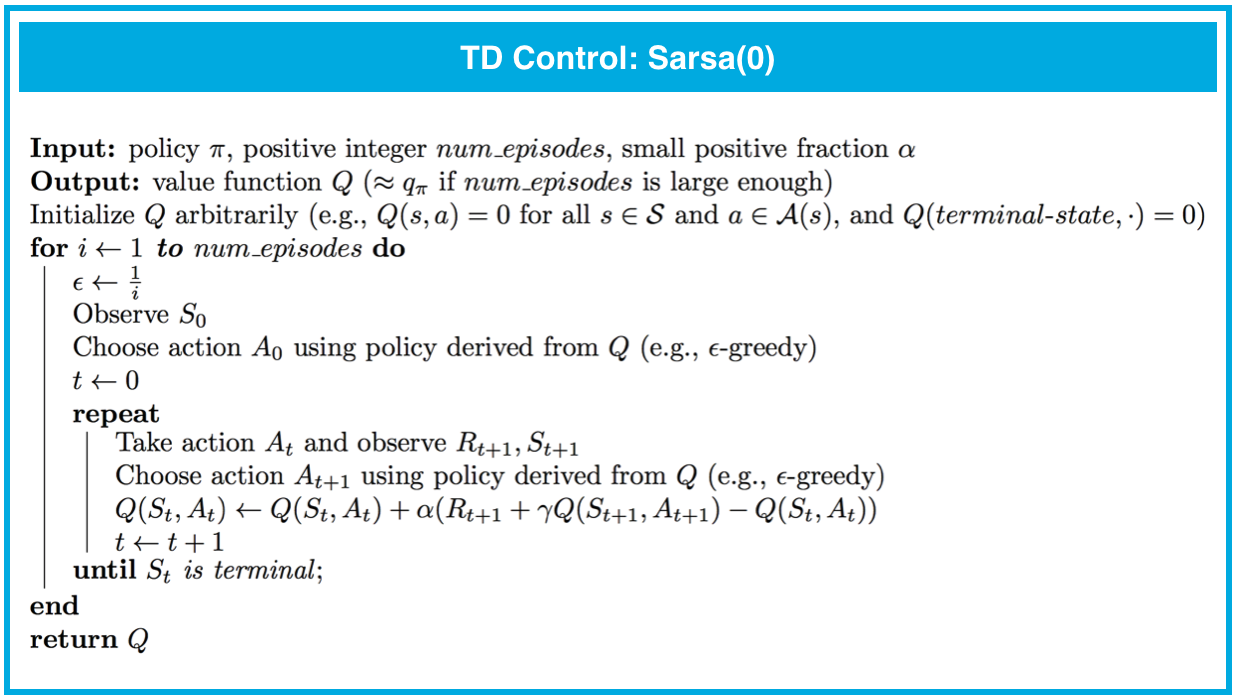

Sarsa(0) 保证会收敛于最优动作值函数，只要步长参数 $\alpha$ 足够小，并且满足有限状态下的无限探索贪婪算法 (GLIE) 条件。我们在上一节课介绍了 GLIE 条件，并且讲解了 MC 控制。虽然有满足 GLIE 条件的很多方式，但是有一种方式在构建 $\epsilon$ 贪婪策略时会逐渐降低 $\epsilon$ 的值。

尤其是，使 $\epsilon_i$对应于第 i 个时间步。然后，如果我们按照以下条件设置 $\epsilon_i$：

- 对于所有时间步 i，$\epsilon_i$ > 0，以及
- 当时间步 i 接近无穷大时，$\epsilon_i$降低到 0（即 $\lim_{i\to\infty} \epsilon_i = 0$），  

然后该算法会保证产生一个很好的 $q_*$ 估值，只要我们运行该算法足够长的时间。然后，可以通过对所有 $s\in\mathcal{S}$ 设置 $\pi_*(s) = \arg\max_{a\in\mathcal{A}(s)} q_*(s, a)$，获得相应的最优策略 $\pi_*$ 。

### TD控制：sarsamax （也称：Q learning）
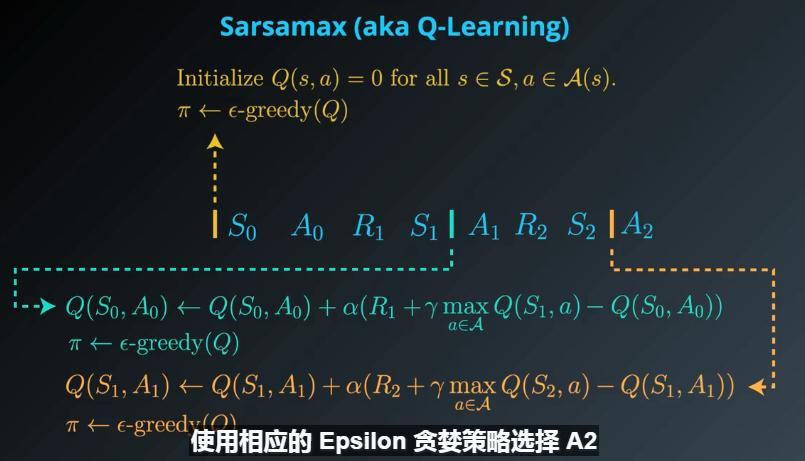

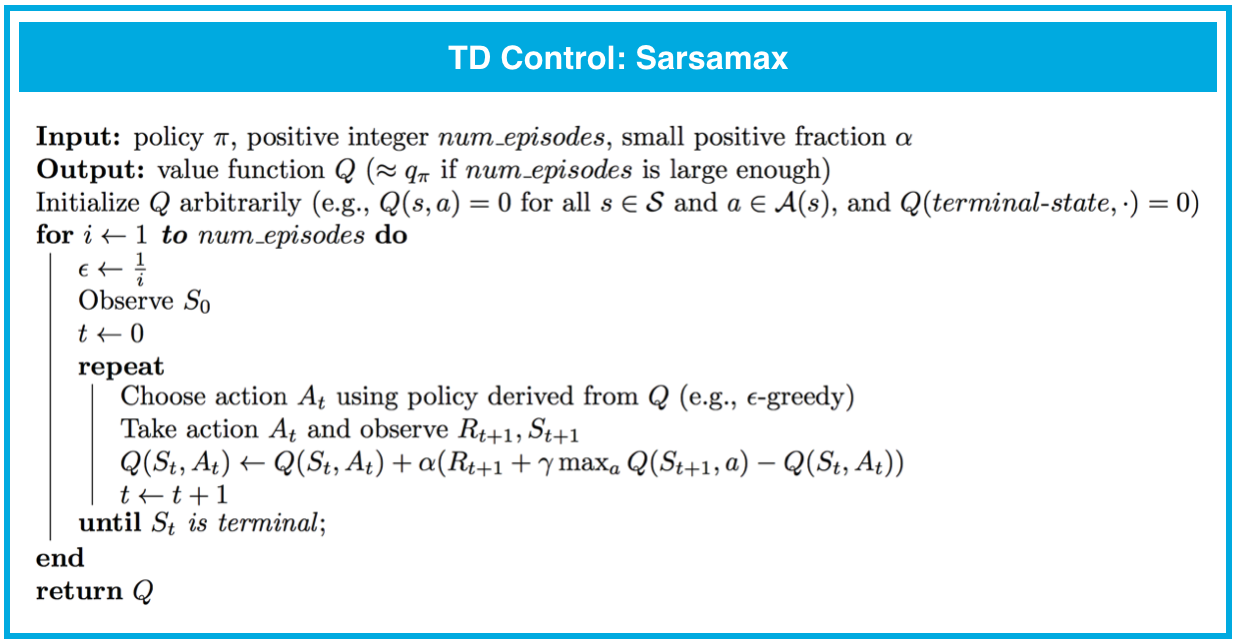
Sarsamax 会在保证 Sarsa 会收敛的同一条件下保证收敛

###TD控制：预期Sarsa （Expected Sarsa）
和sarsamax很像，唯一区别是动作值的更新步骤。

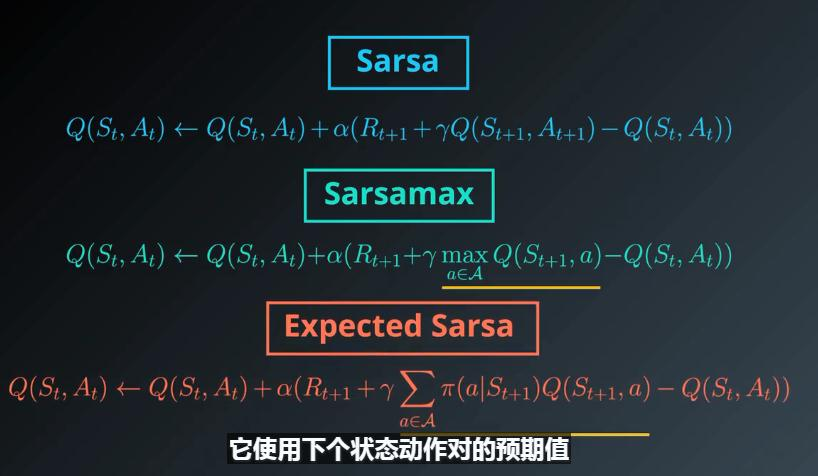

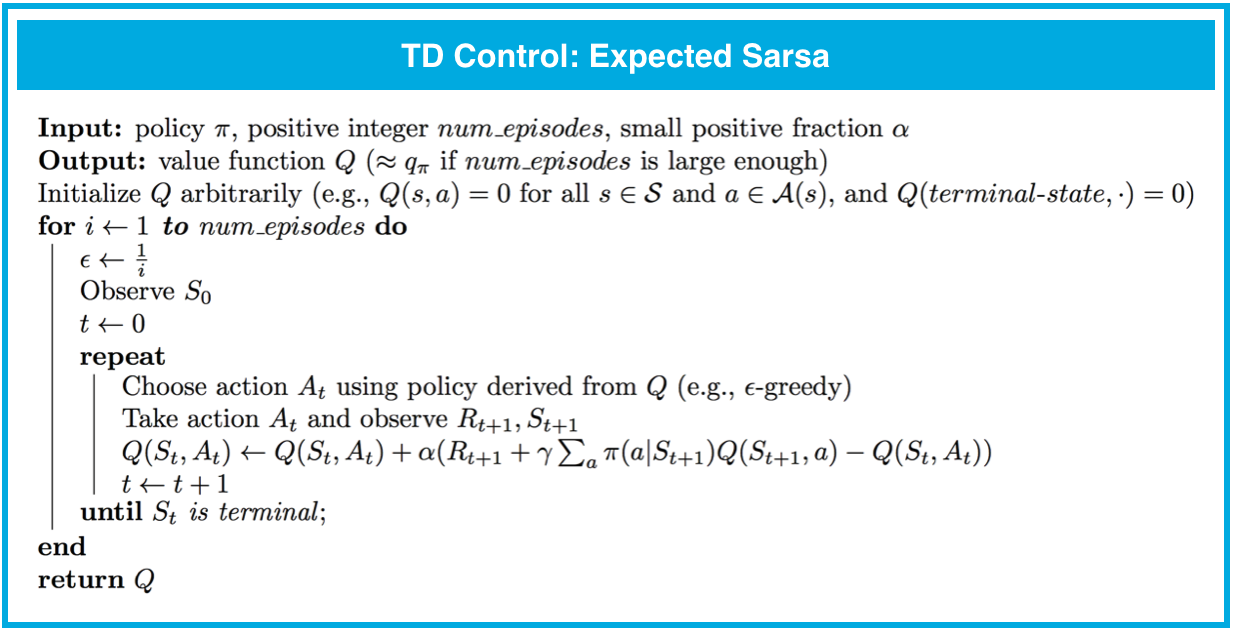

预期 Sarsa 会在保证 Sarsa 和 Sarsamax 会收敛的同一条件下保证收敛。

注意，从理论上讲，只要步长参数 $\alpha$ 足够小，并且满足有限状态下的无限探索贪婪算法 (GLIE) 条件，智能体保证最终会发现最优动作值函数（以及相关的最优策略）。但是，在实践中，对于我们所讨论的所有算法，通常都会完全忽略这些条件并依然能够发现最优策略。你可以在解决方案notebook中找到此类示例。

### 分析性能
在以下情况下，我们讨论过的所有 TD 控制算法（Sarsa、Sarsamax、预期 Sarsa）都会收敛于最优动作值函数 $q_*$（并生成最优策略 $\pi_*$）：(1)$\epsilon$的值根据 GLIE 条件逐渐降低，以及 (2) 步长参数$ \alpha$ 足够小。

这些算法之间的区别总结如下：

- Sarsa 和预期 Sarsa 都是异同策略 TD 控制算法。在这种情况下，我们会根据要评估和改进的相同（$\epsilon$ 贪婪策略）策略选择动作。
- Sarsamax 是离线策略方法，我们会评估和改进（$\epsilon$ 贪婪）策略，并根据另一个策略选择动作。
- 既定策略 TD 控制方法（例如预期 Sarsa 和 Sarsa）的在线效果比新策略 TD 控制方法（例如 Sarsamax）的要好。
- 预期 Sarsa 通常效果比 Sarsa 的要好。

### 总结
#### TD 预测：TD(0)
- 虽然蒙特卡洛 (MC) 预测方法必须等到阶段结束时才能更新值函数估值，但是时间差分 (TD) 方法在每个时间步之后都会更新值函数。
- 对于任何固定策略，一步 TD（或 TD(0)）保证会收敛于真状态值函数，只要步长参数 $\alpha$ 足够小。
- 在实践中，TD 预测的收敛速度比 MC 预测得要快。

#### TD 预测：动作值
-（在此部分，我们讨论了估算动作值的 TD 预测算法。和 TD(0) 算法相似，该算法保证会收敛于真动作值函数，只要步长参数 $\alpha$ 足够小。）

#### TD 控制：Sarsa(0)
- Sarsa(0)（或 Sarsa）是既定策略 TD 控制方法。它保证会收敛于最优动作值函数$ q_*$，只要步长参数 $\alpha$ 足够小，并且所选的 $\epsilon$ 满足有限状态下的无限探索贪婪算法 (GLIE) 条件。

#### TD 控制：Sarsamax
- Sarsamax（或 Q 学习）是一种新策略 TD 控制方法。它会在保证 Sarsa 算法会收敛的相同条件下保证收敛于最优动作值函数$q_*$。

#### TD 控制：预期 Sarsa
- 预期 Sarsa 是一种新策略 TD 控制方法。它会在保证 Sarsa 和 Sarsamax 算法会收敛的相同条件下保证收敛于最优动作值函数$ q_*$。

#### 分析性能
- 既定策略 TD 控制方法（例如 Sarsa 和 Sarsa）比新策略 TD 控制方法（例如 Q 学习）的在线性能好。  
- 预期 Sarsa 通常性能比 Sarsa 好。